In [ ]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [ ]:
! pip install kaggle #installing the kaggle api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle #creating kaggle directory in collab

In [ ]:
! cp kaggle.json ~/.kaggle/ #copying kaggle.json which includes the kaggle login credentials to kaggle directory

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #changing the permission of the file 

In [ ]:
! kaggle datasets download vijaygiitk/multiclass-weather-dataset #downloading the kaggle dataset dataset available on :https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset

 99% 133M/134M [00:06<00:00, 22.2MB/s]
100% 134M/134M [00:06<00:00, 21.1MB/s]


In [ ]:
! unzip multiclass-weather-dataset.zip  #unziping the downloaded dataset

Archive:  multiclass-weather-dataset.zip
  inflating: dataset/alien_test/Cloud_1.png  
  inflating: dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/alien_test/foggy_1.jpg  
  inflating: dataset/alien_test/foggy_10.jpg  
  inflating: dataset/alien_test/foggy_2.jpg  
  inflating: dataset/alien_test/foggy_3.jpg  
  inflating: dataset/alien_test/foggy_4.jpg  
  inflating: dataset/alien_test/foggy_5.jpg  
  inflating: dataset/alien_test/foggy_6.jpg  
  inflating: dataset/alien_test/foggy_7.jpg  
  inflating: dataset/alien_test/foggy_8.jpg  
  inflating: dataset/alien_test/foggy_9.jpg  
  inflating: dataset/alien_test/rain_1.jpg  
  inflating: dataset/alien_test/rain_2.png  
  inflating: dataset/alien_test/rain_3.jpg  
  inflating: dataset/alien_test/rain_4.jpg  
  inflating: dataset/alien_test/rain_5.jpg  
  inflating: dataset/alien_test/rain_6.jpg  
  inflating: dataset/alien_test/shine_1.jpg

In [ ]:
!mkdir /test_dir #creating test directory

In [ ]:
!mv /content/dataset/alien_test /test_dir #moving the file containing test images to test directory
test_direc="/test_dir/alien_test/"

In [ ]:
!mv "/content/dataset/test.csv" "/test_dir" #moving the file containing test image dabels to test directory
train_dir ="/content/dataset" #training set directory path

In [ ]:
labels=os.listdir(train_dir)
print(labels)#class labels

['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']


In [ ]:
from keras.preprocessing.image import ImageDataGenerator #keras data augmentation module 

In [ ]:

train_image_generator = ImageDataGenerator(rescale=1.0/255,
                                          zoom_range=0.3,
                                          height_shift_range=0.2,
                                          width_shift_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          validation_split=0.2) #imagegenerator for training data
train_data_generator = train_image_generator.flow_from_directory(train_dir,
                                                    target_size=(224 , 224),
                                                    batch_size= 32,
                                                    shuffle=True,
                                                    class_mode='categorical',
                                                    subset='training') #training data 
validation_data_generator = train_image_generator.flow_from_directory(train_dir,
                                                                target_size=(224 ,224),
                                                                batch_size=32,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                subset='validation') # validation data 

Found 1200 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


In [ ]:
print("Training data details")
print("-"*30)
print("Number of samples",train_data_generator.samples)
print("Number of classes", train_data_generator.class_indices)
print("Number of samples per class", int(train_data_generator.samples/len(train_data_generator.class_indices)))
print("Test data details")
print("-"*30)
print("Number of samples",validation_data_generator.samples)
print("Number of classes", validation_data_generator.class_indices)
print("Number of samples per class", int(validation_data_generator.samples/len(validation_data_generator.class_indices)))

Training data details
------------------------------
Number of samples 1200
Number of classes {'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}
Number of samples per class 240
Test data details
------------------------------
Number of samples 300
Number of classes {'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}
Number of samples per class 60


In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16 #importing pretrained vgg16

In [ ]:
from keras import Sequential
#VGG-16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing all layers in VGG16 model
for layer in vgg16_model.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg16_model)
#flattening output from the frpzen vgg16 into a vector with one dimension
model.add(Flatten())
#dense layer with 64 nodes
model.add(Dense(64, activation='relu'))
#dense layer with 32 nodes
model.add(Dense(32, activation='relu'))
#dense layer with 16 nodes
model.add(Dense(16, activation='relu'))
#output layer with nodes for 5 classes
model.add(Dense(5, activation='softmax'))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 16,323,077
Trainable params: 1,608,389
Non

In [ ]:
#fitting the model with train and validation data generator
hist = model.fit(train_data_generator, validation_data = validation_data_generator,steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
                    epochs=15
                    ) 

Epoch 1/15
37/37 [==============================] - 36s 664ms/step - loss: 1.3841 - accuracy: 0.4058 - val_loss: 1.1840 - val_accuracy: 0.5208
Epoch 2/15
37/37 [==============================] - 24s 639ms/step - loss: 0.8817 - accuracy: 0.6755 - val_loss: 0.8845 - val_accuracy: 0.6944
Epoch 3/15
37/37 [==============================] - 23s 632ms/step - loss: 0.6567 - accuracy: 0.7731 - val_loss: 0.6337 - val_accuracy: 0.7743
Epoch 4/15
37/37 [==============================] - 23s 610ms/step - loss: 0.5144 - accuracy: 0.8245 - val_loss: 0.6637 - val_accuracy: 0.7882
Epoch 5/15
37/37 [==============================] - 23s 624ms/step - loss: 0.4617 - accuracy: 0.8510 - val_loss: 0.6168 - val_accuracy: 0.8229
Epoch 6/15
37/37 [==============================] - 23s 625ms/step - loss: 0.4578 - accuracy: 0.8382 - val_loss: 0.5987 - val_accuracy: 0.7812
Epoch 7/15
37/37 [==============================] - 23s 615ms/step - loss: 0.3874 - accuracy: 0.8690 - val_loss: 0.5756 - val_accuracy: 0.8021

In [ ]:
from keras import Sequential
#VGG-16 model this model is built based on the vgg16 architecture
model1 = Sequential()
#block 1
model1.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#block 2
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#block 3
model1.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=256,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#block 4
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#block 5
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#block 6
model1.add(Flatten())
model1.add(Dense(units=4096, activation="relu"))
model1.add(Dense(units=4096, activation="relu"))
model1.add(Dense(units=5, activation="softmax"))

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
# model.build()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
#fitting the model with train and validation data generator
hist_model1 = model1.fit(train_data_generator, validation_data = validation_data_generator,steps_per_epoch=train_data_generator.n // train_data_generator.batch_size,validation_steps=validation_data_generator.n // validation_data_generator.batch_size,
                    epochs=15
                    ) 

Epoch 1/15
37/37 [==============================] - 33s 727ms/step - loss: 1.6345 - accuracy: 0.2277 - val_loss: 1.6064 - val_accuracy: 0.2292
Epoch 2/15
37/37 [==============================] - 24s 650ms/step - loss: 1.6079 - accuracy: 0.2354 - val_loss: 1.6058 - val_accuracy: 0.2257
Epoch 3/15
37/37 [==============================] - 28s 748ms/step - loss: 1.6945 - accuracy: 0.2089 - val_loss: 1.6072 - val_accuracy: 0.2361
Epoch 4/15
37/37 [==============================] - 24s 666ms/step - loss: 1.6067 - accuracy: 0.2226 - val_loss: 1.6054 - val_accuracy: 0.2292
Epoch 5/15
37/37 [==============================] - 25s 648ms/step - loss: 1.6039 - accuracy: 0.2397 - val_loss: 1.6056 - val_accuracy: 0.2361
Epoch 6/15
37/37 [==============================] - 24s 656ms/step - loss: 1.6752 - accuracy: 0.2543 - val_loss: 1.6127 - val_accuracy: 0.1979
Epoch 7/15
37/37 [==============================] - 24s 637ms/step - loss: 1.6070 - accuracy: 0.2260 - val_loss: 1.6029 - val_accuracy: 0.2361

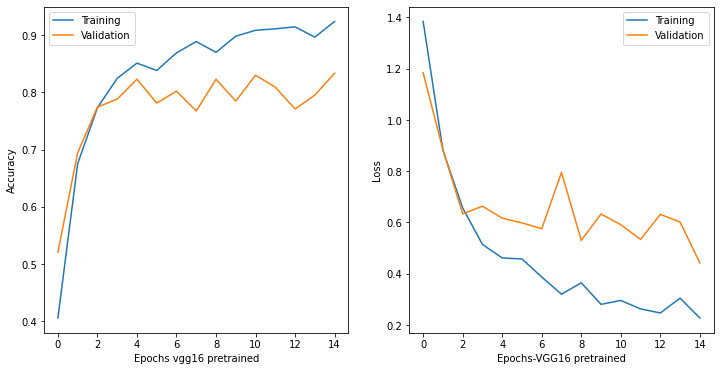

In [ ]:
import matplotlib.pyplot as plt
#this is the plotting of performance of vgg 16 model with transfer learning

#training accuracy of model
train_acc = hist.history['accuracy']
#training loss of model
train_loss = hist.history['loss']
#validation accuracy of model
val_acc = hist.history['val_accuracy']
#validation loss of model
val_loss = hist.history['val_loss']

plt.figure(figsize=(12, 8))

#plotting training and validation accuracy for the epochs
plt.subplot(1, 2, 1) 
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xlabel('Epochs vgg16 pretrained')
plt.ylabel('Accuracy')
plt.legend()

#plotting training and validation loss for the epochs
plt.subplot(1, 2, 2) 
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xlabel('Epochs-VGG16 pretrained')
plt.ylabel('Loss')
plt.legend()


plt.show()

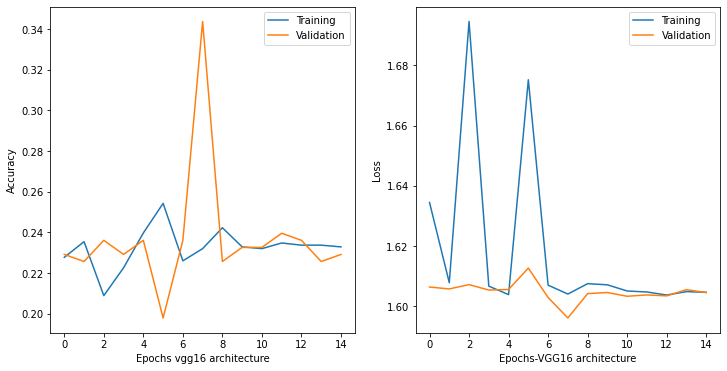

In [ ]:
#this is the plotting of performance of vgg 16 arechitecture based model

#training accuracy of model
train_acc_model1 = hist_model1.history['accuracy']
#training loss of model
train_loss_model1 = hist_model1.history['loss']
#validation accuracy
val_acc_model1 = hist_model1.history['val_accuracy']
#validation loss
val_loss_model1 = hist_model1.history['val_loss']

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1) 
#plotting training and validation accuracy for the epochs
plt.plot(train_acc_model1, label='Training')
plt.plot(val_acc_model1, label='Validation')
plt.xlabel('Epochs vgg16 architecture')
plt.ylabel('Accuracy')
plt.legend()

#plotting training and validation loss for the epochs
plt.subplot(1, 2, 2) 
plt.plot(train_loss_model1, label='Training')
plt.plot(val_loss_model1, label='Validation')
plt.xlabel('Epochs-VGG16 architecture')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [ ]:
test_df = pd.read_csv('/test_dir/test.csv')
target_size = (224, 224) # Defining the target size as 224 X 224
re = 1.0/255 # rescaling for images
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Create empty arrays for storing the true and predicted labels
actual = []
predicted_model = []
pred_model1 =[]
#predicting outcome of each image in test_dir
for i, row in test_df.iterrows():
    path = f'/test_dir/alien_test/{row["Image_id"]}'  # Loading image
    image = load_img(path, target_size=target_size)  # resizing image
    arr = img_to_array(image) * re # image rescaling 
    image_batch = np.expand_dims(arr, axis=0) # adding batch dimension
    img_pred = model.predict(image_batch)[0] # prediction using the vgg16 model with transfer learning
    img_pred_model1 = model1.predict(image_batch)[0] #prediction using the vgg16 model 
    image_pred_label = np.argmax(img_pred) # the predicted label for vgg16 with transfer learning
    image_pred_label_model1 = np.argmax(img_pred_model1) # the predicted label for vgg16 
    actual.append(row['labels'])  # appending both actual label to list
    predicted_model.append(image_pred_label)  # appending predicted label to th list
    pred_model1.append(image_pred_label_model1)


accuracy_model = sum([1 for i in range(len(actual)) if actual[i] == predicted_model[i]]) / len(actual) # accuracy for model with transfer learning
accuracy_model1= sum([1 for i in range(len(actual)) if actual[i] == pred_model1[i]]) / len(actual) # accuracy for model vgg16 


1/1 [==============================] - 0s 18ms/step


In [ ]:
print(f'Test accuracy for model with transfer learning: {accuracy_model}') #printing accuracy on test data for transfer learning
print(f'Test accuracy for vgg16 build from scratch: {accuracy_model1}') #printing accuracy on test data

Test accuracy for model with transfer learning: 0.9333333333333333
Test accuracy for vgg16 build from scratch: 0.23333333333333334
